### Cookiecat_A_B_test_result_analysis

In [2]:
import pandas as pd
import numpy as np
import re

df = pd.read_csv('./cookie_cats.csv')

In [3]:
df.isnull().sum()

userid            0
version           0
sum_gamerounds    0
retention_1       0
retention_7       0
dtype: int64

In [4]:
df

,userid,version,sum_gamerounds,retention_1,retention_7
0,116,gate_30,3,False,False
1,337,gate_30,38,True,False
2,377,gate_40,165,True,False
3,483,gate_40,1,False,False
4,488,gate_40,179,True,True
...,...,...,...,...,...
90184,9999441,gate_40,97,True,False
90185,9999479,gate_40,30,False,False
90186,9999710,gate_30,28,True,False
90187,9999768,gate_40,51,True,False


In [7]:
preprocessed_df = df

### 두 그룹으로 나눈 뒤 플레이 라운드 평균값은 달랐다.
gate_30 mean	52.456264    
gate_40 mean	51.298776

### 설치 후 1일 & 7일 플레이 gate_30 / gate_40

In [8]:
both_reten_df = preprocessed_df[
(preprocessed_df['retention_1']==True)
&(preprocessed_df['retention_7']==True)
&(preprocessed_df['sum_gamerounds']< 500)]

In [9]:
Q1 = both_reten_df['sum_gamerounds'].quantile(0.25)
Q3 = both_reten_df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [10]:
upper_bound

434.25

### 설치 후 1일 & 7일 플레이 시각화

In [11]:
import seaborn as sns

sns.set_style("whitegrid")

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1066/2235391771.py:1: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=both_reten_df,


<Axes: xlabel='version', ylabel='sum_gamerounds'>

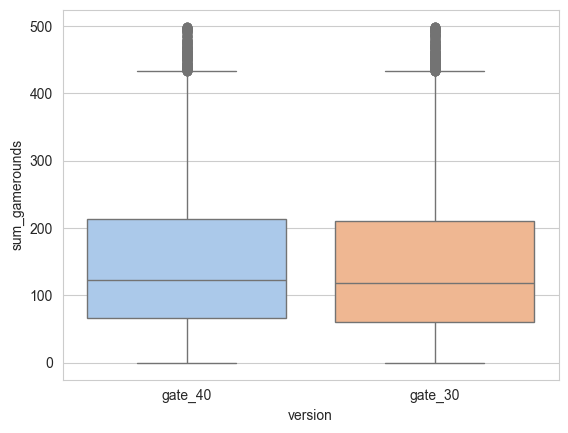

In [12]:
sns.boxplot(data=both_reten_df, 
            x="version", 
            y="sum_gamerounds",
           palette = "pastel")

<Axes: xlabel='version', ylabel='sum_gamerounds'>

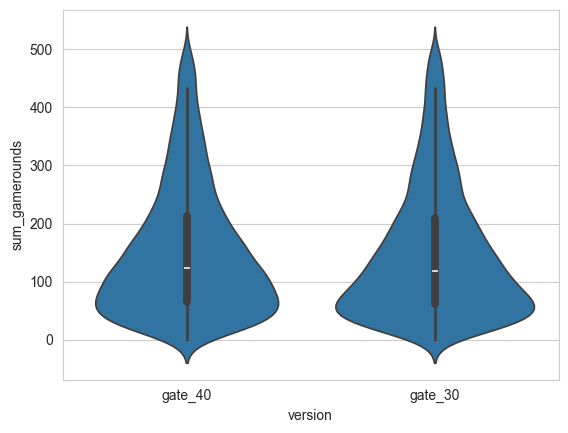

In [13]:
sns.set_style("whitegrid")
sns.violinplot(data=both_reten_df, 
              x = "version",
              y = "sum_gamerounds",
)

Text(0.5, 1.0, 'gamerounds Histogram')

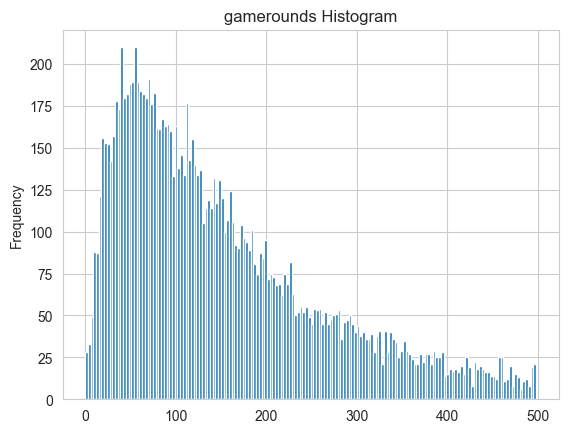

In [14]:
import numpy as np
from matplotlib import pyplot as plt

both_reten_df['sum_gamerounds'].plot(
    kind = "hist",
    bins = np.arange(0,500,3)
)
plt.title("gamerounds Histogram")

### 설치 후 1일만 플레이 gate_30 / gate_40

In [15]:
# gate_30
af1_reten_df = preprocessed_df[
(preprocessed_df['retention_1']==True)
&(preprocessed_df['retention_7']==False)
&(preprocessed_df['sum_gamerounds']< 125)]

In [16]:
Q1 = af1_reten_df['sum_gamerounds'].quantile(0.25)
Q3 = af1_reten_df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [17]:
lower_bound

-40.5

In [18]:
upper_bound

107.5

In [19]:
import seaborn as sns

sns.set_style("whitegrid")

<Axes: xlabel='version', ylabel='sum_gamerounds'>

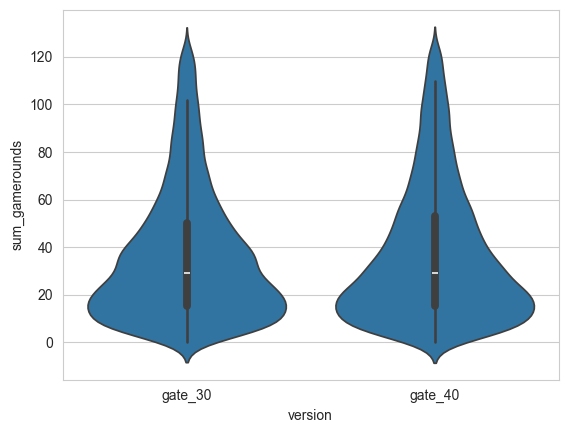

In [20]:
# boxenplot 그리기
sns.set_style("whitegrid")
sns.violinplot(data=af1_reten_df, 
              x = "version",
              y = "sum_gamerounds"
)

### 설치 후 7일만 플레이 gate_30 / gate_40

In [21]:
# gate_30
af7_reten_df = preprocessed_df[
(preprocessed_df['retention_1']==False)
&(preprocessed_df['retention_7']==True)
& (preprocessed_df['sum_gamerounds']<200)]

In [22]:
Q1 = af7_reten_df['sum_gamerounds'].quantile(0.25)
Q3 = af7_reten_df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [23]:
upper_bound

167.0

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1066/124497671.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.stripplot(


<Axes: xlabel='version', ylabel='sum_gamerounds'>

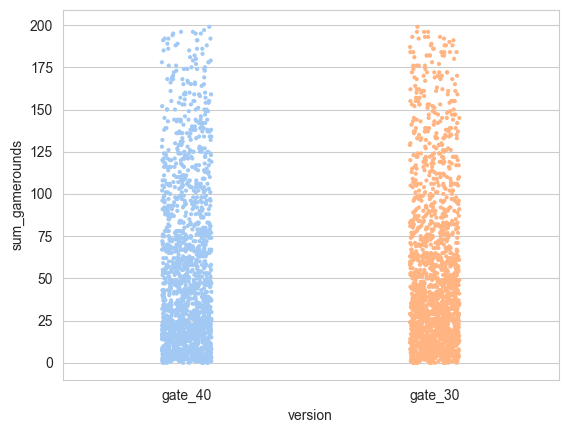

In [24]:
import seaborn as sns

sns.set_style("whitegrid")
sns.stripplot(
    x = "version",
    y = "sum_gamerounds",
    data = af7_reten_df,
    size =3,
    palette = "pastel"
)

<Axes: xlabel='version', ylabel='sum_gamerounds'>

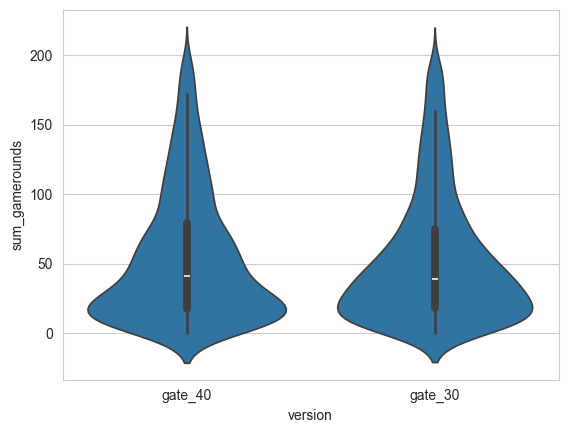

In [25]:
# boxenplot 그리기
sns.set_style("whitegrid")
sns.violinplot(data=af7_reten_df, 
              x = "version",
              y = "sum_gamerounds"
)

In [26]:
Q1 = af7_reten_df['sum_gamerounds'].quantile(0.25)
Q3 = af7_reten_df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [27]:
upper_bound

167.0

## 설치 이후 1일 & & 7일 플레이 안함

In [28]:
both_non_reten_df= preprocessed_df[
(preprocessed_df['retention_1']==False)
&(preprocessed_df['retention_7']==False) 
& (preprocessed_df['sum_gamerounds']<35)]

In [29]:
Q1 = both_non_reten_df['sum_gamerounds'].quantile(0.25)
Q3 = both_non_reten_df['sum_gamerounds'].quantile(0.75)
IQR = Q3 - Q1

# 아웃라이어 조건
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

In [30]:
upper_bound

24.5

<Axes: xlabel='version', ylabel='sum_gamerounds'>

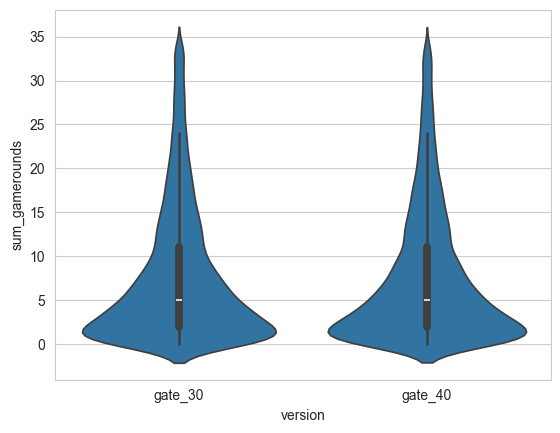

In [31]:
import seaborn as sns

sns.set_style("whitegrid")
sns.violinplot(data=both_non_reten_df, 
              x = "version",
              y = "sum_gamerounds"
)

<Axes: xlabel='version', ylabel='sum_gamerounds'>

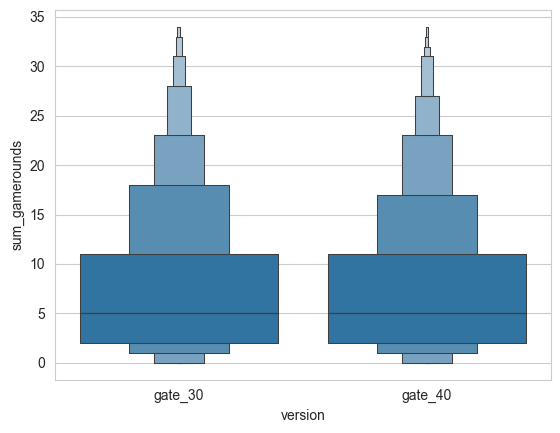

In [32]:


# boxenplot 그리기
sns.set_style("whitegrid")
sns.boxenplot(data=both_non_reten_df, 
              x = "version",
              y = "sum_gamerounds"
)

In [33]:
# 몇판정도 하고 이탈이 가장 많았는지? 레벨을 재조정하는게 좋을까? 난이도가 적절했는지..?
# 7일 뒤에 다시 돌아오는 사람들의 이유를 추적할 수 있을까?
# 각각의 경우의 수에, 평균 게임라운드분포를 찾고 이상치 조절해서 데이터 봐보기

### 전체 조건별 데이터 분류

In [34]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 조건에 따른 그룹 분류
conditions = [
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 500) & preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 125) & preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 200) & ~preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 35) & ~preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],

    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 500) & preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 125) & preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 200) & ~preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 35) & ~preprocessed_df['retention_1'] & ~preprocessed_df['retention_7']
]

choices = [
    'gate_30_Both Days', 'gate_30_Only Day 1', 'gate_30_Only Day 7', 'gate_30_Neither Day',
    'gate_40_Both Days', 'gate_40_Only Day 1', 'gate_40_Only Day 7', 'gate_40_Neither Day'
]
preprocessed_df['group'] = np.select(conditions, choices, default='Other')

# 'Other' 그룹 제거 (필요하지 않은 경우)
preprocessed_df = preprocessed_df[preprocessed_df['group'] != 'Other']

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1066/1414484199.py:8: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.violinplot(x='group', y='sum_gamerounds', data=preprocessed_df, order=group_order, palette='pastel')


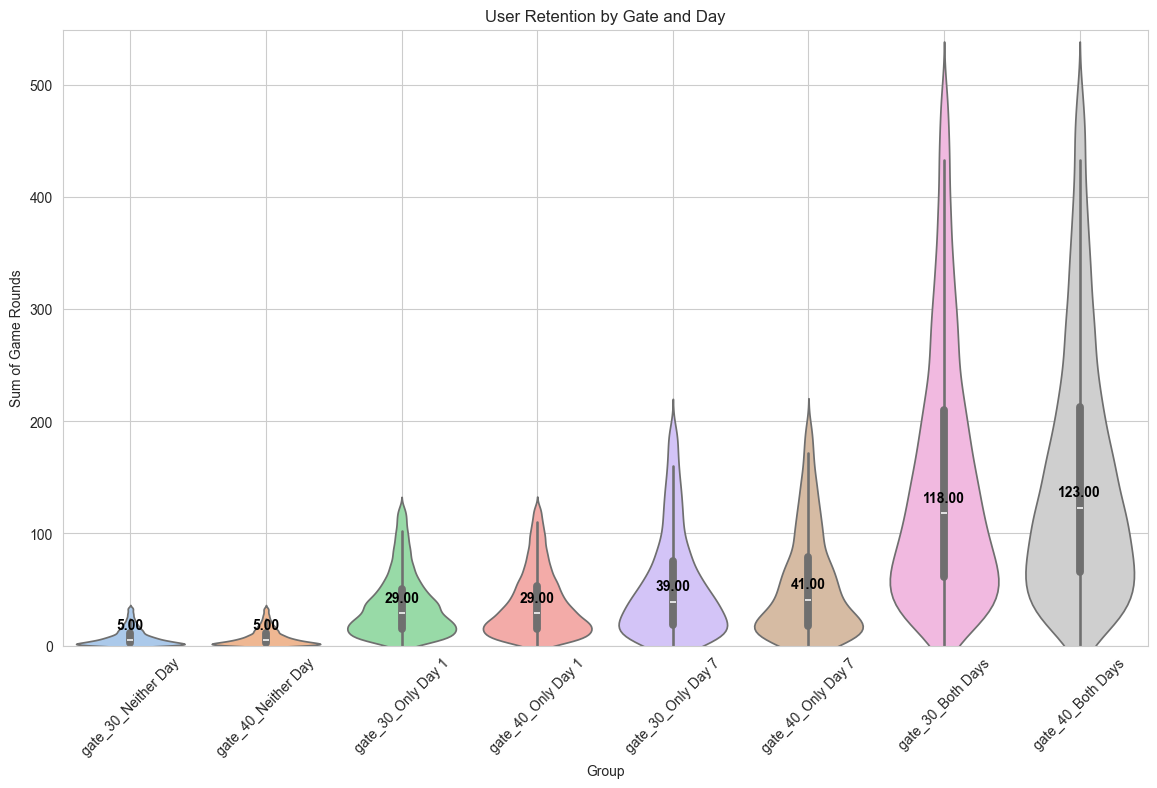

In [35]:
group_order = preprocessed_df.groupby('group')['sum_gamerounds'].median().sort_values().index

medians = preprocessed_df.groupby('group')['sum_gamerounds'].median().reindex(group_order)


# 시각화
plt.figure(figsize=(14, 8))
ax = sns.violinplot(x='group', y='sum_gamerounds', data=preprocessed_df, order=group_order, palette='pastel')

for i, median in enumerate(medians):
    ax.text(i, median + 10, f'{median:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')
    
plt.title('User Retention by Gate and Day')
plt.xlabel('Group')
plt.ylabel('Sum of Game Rounds')
plt.ylim(0, preprocessed_df['sum_gamerounds'].max() + 50)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1066/1200570451.py:23: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  preprocessed_df['group'] = np.select(conditions, choices, default='Other')
/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1066/1200570451.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y='sum_gamerounds', data=preprocessed_df, order=group_order, palette='pastel')


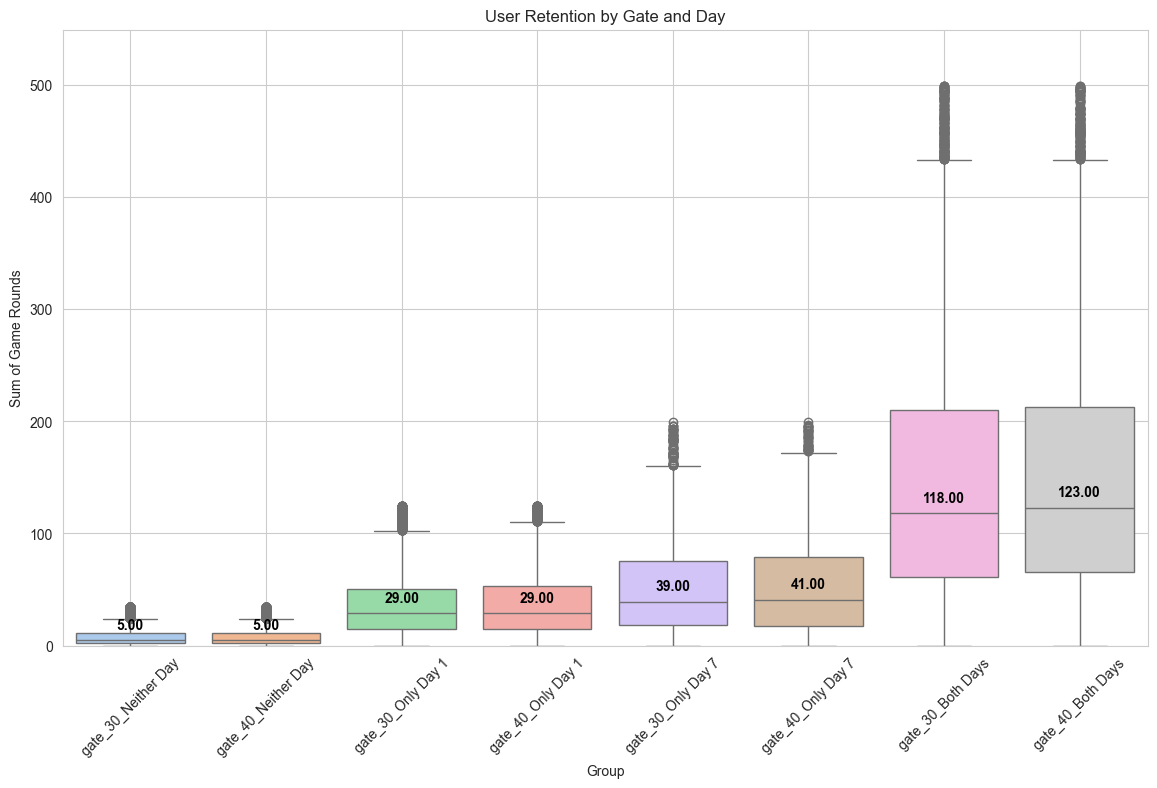

In [36]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 조건에 따른 그룹 분류
conditions = [
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 500) & preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 125) & preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 200) & ~preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 35) & ~preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],

    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 500) & preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 125) & preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 200) & ~preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 35) & ~preprocessed_df['retention_1'] & ~preprocessed_df['retention_7']
]

choices = [
    'gate_30_Both Days', 'gate_30_Only Day 1', 'gate_30_Only Day 7', 'gate_30_Neither Day',
    'gate_40_Both Days', 'gate_40_Only Day 1', 'gate_40_Only Day 7', 'gate_40_Neither Day'
]
preprocessed_df['group'] = np.select(conditions, choices, default='Other')

# 'Other' 그룹 제거 (필요하지 않은 경우)
preprocessed_df = preprocessed_df[preprocessed_df['group'] != 'Other']

# 그룹별 중앙값 계산 및 정렬
group_order = preprocessed_df.groupby('group')['sum_gamerounds'].median().sort_values().index

# 상자 그림 시각화
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='group', y='sum_gamerounds', data=preprocessed_df, order=group_order, palette='pastel')

# 중앙값 계산 및 표시
medians = preprocessed_df.groupby('group')['sum_gamerounds'].median().reindex(group_order)
for i, median in enumerate(medians):
    ax.text(i, median + 10, f'{median:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('User Retention by Gate and Day')
plt.xlabel('Group')
plt.ylabel('Sum of Game Rounds')
plt.ylim(0, preprocessed_df['sum_gamerounds'].max() + 50)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

/var/folders/ly/7phrswwd4gzcgyt5t5p35nqw0000gn/T/ipykernel_1066/805088554.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  ax = sns.boxplot(x='group', y='sum_gamerounds', data=preprocessed_df, order=group_order, palette='pastel')


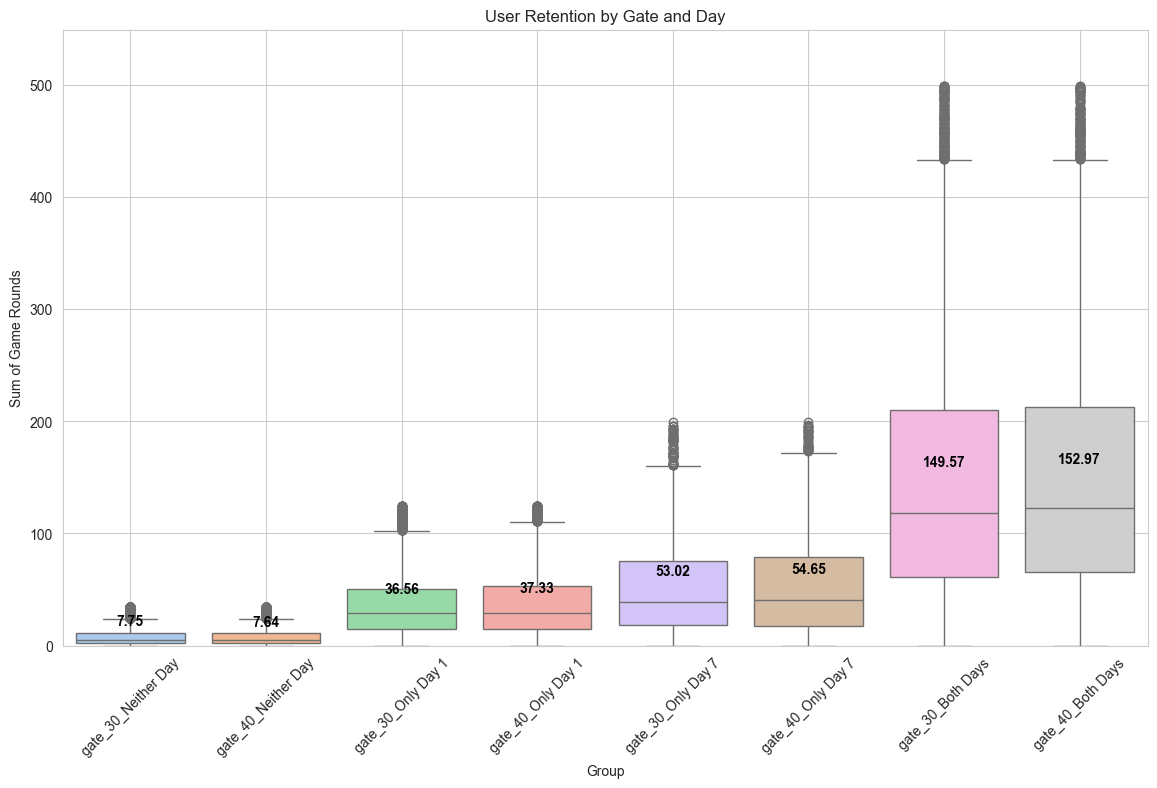

In [37]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# 조건에 따른 그룹 분류
conditions = [
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 500) & preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 125) & preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 200) & ~preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_30') & (preprocessed_df['sum_gamerounds'] < 35) & ~preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],

    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 500) & preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 125) & preprocessed_df['retention_1'] & ~preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 200) & ~preprocessed_df['retention_1'] & preprocessed_df['retention_7'],
    (preprocessed_df['version'] == 'gate_40') & (preprocessed_df['sum_gamerounds'] < 35) & ~preprocessed_df['retention_1'] & ~preprocessed_df['retention_7']
]

choices = [
    'gate_30_Both Days', 'gate_30_Only Day 1', 'gate_30_Only Day 7', 'gate_30_Neither Day',
    'gate_40_Both Days', 'gate_40_Only Day 1', 'gate_40_Only Day 7', 'gate_40_Neither Day'
]
preprocessed_df['group'] = np.select(conditions, choices, default='Other')

# 'Other' 그룹 제거 (필요하지 않은 경우)
preprocessed_df = preprocessed_df[preprocessed_df['group'] != 'Other']

# 그룹별 중앙값 계산 및 정렬
group_order = preprocessed_df.groupby('group')['sum_gamerounds'].median().sort_values().index

# 상자 그림 시각화
plt.figure(figsize=(14, 8))
ax = sns.boxplot(x='group', y='sum_gamerounds', data=preprocessed_df, order=group_order, palette='pastel')

# 평균값 계산 및 표시
means = preprocessed_df.groupby('group')['sum_gamerounds'].mean().reindex(group_order)
for i, mean in enumerate(means):
    ax.text(i, mean + 10, f'{mean:.2f}', horizontalalignment='center', size='medium', color='black', weight='semibold')

plt.title('User Retention by Gate and Day')
plt.xlabel('Group')
plt.ylabel('Sum of Game Rounds')
plt.ylim(0, preprocessed_df['sum_gamerounds'].max() + 50)
plt.xticks(rotation=45)
plt.grid(True)
plt.show()

In [47]:
preprocessed_df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 83634 entries, 0 to 90188
Data columns (total 7 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   userid            83634 non-null  int64 
 1   version           83634 non-null  object
 2   sum_gamerounds    83634 non-null  int64 
 3   retention_1       83634 non-null  bool  
 4   retention_7       83634 non-null  bool  
 5   group             83634 non-null  object
 6   retention_status  83634 non-null  object
dtypes: bool(2), int64(2), object(3)
memory usage: 6.0+ MB


In [39]:

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import chi2_contingency

# Retention 상태 정의
preprocessed_df['retention_status'] = preprocessed_df.apply(
    lambda row: 'Both Days' if row['retention_1'] and row['retention_7'] else
                'Only Day 1' if row['retention_1'] and not row['retention_7'] else
                'Only Day 7' if not row['retention_1'] and row['retention_7'] else
                'Neither Day', axis=1)

# 교차표 생성
contingency_table = pd.crosstab(preprocessed_df['version'], preprocessed_df['retention_status'])
print(contingency_table)

# 카이제곱 검정 수행
chi2, p, dof, expected = chi2_contingency(contingency_table)
print(f"Chi2: {chi2}, p-value: {p}, Degrees of Freedom: {dof}")
print("Expected Frequencies:")
print(expected)

# 결과 해석
if p < 0.05:
    print("The retention status is dependent on the gate version (reject H0).")
else:
    print("The retention status is independent of the gate version (fail to reject H0).")

retention_status  Both Days  Neither Day  Only Day 1  Only Day 7
version                                                         
gate_30                6280        21192       12301        1690
gate_40                6099        21879       12559        1634
Chi2: 11.232685654861783, p-value: 0.010531952542602502, Degrees of Freedom: 3
Expected Frequencies:
[[ 6137.10305617 21353.19215869 12324.77437406  1647.93041108]
 [ 6241.89694383 21717.80784131 12535.22562594  1676.06958892]]
The retention status is dependent on the gate version (reject H0).


In [52]:
preprocessed_df['retention_status'] = preprocessed_df.apply(
    lambda row: 'Both Days' if row['retention_1'] and row['retention_7'] else
                'Only Day 1' if row['retention_1'] and not row['retention_7'] else
                'Only Day 7' if not row['retention_1'] and row['retention_7'] else
                'Neither Day', axis=1)

# 'Neither Day' 상태 제외
# filtered_df = preprocessed_df[preprocessed_df['retention_status'] != 'Neither Day']

# 교차표 생성
contingency_table = pd.crosstab(filtered_df['version'], filtered_df['retention_status'])
print("Contingency Table:")
print(contingency_table)

# 각 버전별 리텐션 비율 계산
retention_ratios = contingency_table.div(contingency_table.sum(axis=1), axis=0)
print("\nRetention Ratios:")
print(retention_ratios)


Contingency Table:
retention_status  Both Days  Only Day 1  Only Day 7
version                                            
gate_30                6280       12301        1690
gate_40                6099       12559        1634

Retention Ratios:
retention_status  Both Days  Only Day 1  Only Day 7
version                                            
gate_30            0.309802    0.606827    0.083370
gate_40            0.300562    0.618914    0.080524


In [56]:
from scipy.stats import ttest_ind, levene

# Gate_30과 Gate_40의 데이터 분리
gate_30 = df[df['version'] == 'gate_30']['sum_gamerounds']
gate_40 = df[df['version'] == 'gate_40']['sum_gamerounds']

# Levene's Test 수행
stat, p_value = levene(gate_30, gate_40)
print(f"Levene's Test Statistic: {stat}")
print(f"Levene's Test p-value: {p_value}")

# 결과 해석
alpha = 0.05
if p_value < alpha:
    print("등분산을 기각할 수 있다 (분산이 다르다).")
    equal_var = False
else:
    print("등분산을 기각할 수 없다 (분산이 동일하다).")
    equal_var = True

# t-검정 수행 (양측 검정)
t_stat, t_p_value = ttest_ind(gate_30, gate_40, equal_var=equal_var)

print(f"T-statistic: {t_stat}")
print(f"T-test p-value: {t_p_value}")

# t-검정 결과 해석
if t_p_value < alpha:
    print("대립가설 채택: Gate_30의 평균 게임라운드 수와 Gate_40의 평균 게임라운드 수의 차이는 유의미하다.")
else:
    print("귀무가설 채택: Gate_30의 평균 게임라운드 수와 Gate_40의 평균 게임라운드 수의 차이는 유의미하지 않다.")

Levene's Test Statistic: 0.5292002638313259
Levene's Test p-value: 0.46694516772623273
등분산을 기각할 수 없다 (분산이 동일하다).
T-statistic: 0.8910426211362967
T-test p-value: 0.37290868247405207
귀무가설 채택: Gate_30의 평균 게임라운드 수와 Gate_40의 평균 게임라운드 수의 차이는 유의미하지 않다.


In [57]:
# 단측 t-검정 수행 (gate_40 > gate_30)
t_stat, t_p_value = ttest_ind(gate_40, gate_30, equal_var=equal_var, alternative='greater')

print(f"T-statistic: {t_stat}")
print(f"T-test p-value: {t_p_value}")

# t-검정 결과 해석
if t_p_value < alpha:
    print("대립가설 채택: Gate_40의 평균 게임라운드 수가 Gate_30의 평균 게임라운드 수보다 유의미하게 크다.")
else:
    print("귀무가설 채택: Gate_40의 평균 게임라운드 수가 Gate_30의 평균 게임라운드 수보다 유의미하게 크지 않다.")

T-statistic: -0.8910426211362967
T-test p-value: 0.8135456587629739
귀무가설 채택: Gate_40의 평균 게임라운드 수가 Gate_30의 평균 게임라운드 수보다 유의미하게 크지 않다.
